In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df_insure=pd.read_csv("insurance.csv")

In [3]:
# Showing the first five rows
df_insure.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset has 1338 rows/records, 6 features, and 1 target variable. 3 of the features (sex, smoker, region) are categorical variables and 3 others (age, bmi, children,charges ) are numerical.

In [4]:
df_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_insure.shape

(1338, 7)

In [6]:
df_insure.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df_insure.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
df_insure.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
categorical = ['sex', 'smoker', 'region']
df_insure[categorical].nunique()

sex       2
smoker    2
region    4
dtype: int64

2. Scrubbing Data

Handling duplicated rows.

In [83]:
# Finding and removing duplicate records
df_insure.duplicated().sum()

1

In [84]:
#finding the null value in the data set 
df_insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [85]:
# Printing the duplicated rows
print(df_insure[df_insure.duplicated(keep = "last")],"\n")
print(df_insure[df_insure.duplicated(keep = "first")])

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631 

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [86]:
# Removing the duplicate
mask = ~ df_insure.duplicated()
df_insure = df_insure[mask]
print(f"Rows, columns: {df_insure.shape}")

Rows, columns: (1337, 7)


Handling missing values

In [87]:
# Checking the total number of missing values
df_insure.isnull().values.sum()

0

There are no missing values.

Checking String-Encoded Categorical Data for Consistency

In [88]:
# Printing unique values for the categorical columns
print(df_insure.sex.unique(), "\n")
print(df_insure.smoker.unique(),"\n")
print(df_insure.region.unique())

['female' 'male'] 

['yes' 'no'] 

['southwest' 'southeast' 'northwest' 'northeast']


The values in these columns are consistent. The sex and the smoker columns have two distinct values, whereas the region column has four.

Checking Numerical Data for Consistency

In [89]:
# Printing unique values for the numeric columns
print(f"Unique values for the age column:\n{df_insure.age.unique()}\n")
print(f"Unique values for the bmi column:\n{df_insure.bmi.unique()}\n")
print(f"Total number of unique values in the bmi column: {df_insure.bmi.nunique()}\n")
print(f"Unique values for the children column:\n{df_insure.children.unique()}")

Unique values for the age column:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

Unique values for the bmi column:
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35

In [17]:
# Displaying summary statistics for the numeric columns
df_insure.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [90]:
# Creating a class that returns lower and upper boundaries
class OutlierBoundary:
    """The class accepts one argument and returns the upper and lower boundaries.
    """
    def __init__(self, dataset):
        """Initiates the class
        """
        self.dataset = dataset
    def outlier(self):
        """The function detects the upper and lower class boundaries
        """
        
        # Creating a list of columns for which to return the upper and lower boundaries
        column_list = ["age", "bmi", "children", "charges"] 
        
        # Iterating over the list of columns
        for column in self.dataset:
            
            # Checking whether the columns in the list are also found in the dataset
            if column in column_list:
                
                # Extracting the summary statistics
                des = self.dataset[column].describe()
                
                # Creating the dictionary that stores the summary statistics
                desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
                
                # Calculating first and third quartiles
                Q1 = des[desPairs["25"]]
                Q3 = des[desPairs["75"]]
                
                # Calculating the inter-quartile range
                IQR = Q3-Q1
                
                # Calculating the lower and upper boundaries
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR
                
                # Printing the boundaries for each column
                print(f"The upper boundary for the {column} column is {upper} and the lower boundary is {lower}.")

In [91]:
# Storing the boundaries
p = OutlierBoundary(df_insure)

In [92]:
# Printing the boundaries for our target columns
p.outlier()

The upper boundary for the age column is 87.0 and the lower boundary is -9.0.
The upper boundary for the bmi column is 47.31500000000001 and the lower boundary is 13.674999999999994.
The upper boundary for the children column is 5.0 and the lower boundary is -3.0.
The upper boundary for the charges column is 34524.777625 and the lower boundary is -13120.716174999998.


C:\Users\DELL\AppData\Local\Temp\ipykernel_8536\711290855.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = des[desPairs["25"]]
C:\Users\DELL\AppData\Local\Temp\ipykernel_8536\711290855.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = des[desPairs["75"]]
C:\Users\DELL\AppData\Local\Temp\ipykernel_8536\711290855.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = des[desPairs["25"]]
C:\Users\DELL\AppData\Local\

Any value below the lower boundary and above the upper boundary is treated as an outlier.

In [93]:
# Printing the total estimate of potential outliers
print("The total number of outliers that can be removed is:",
      len(df_insure[df_insure.age > 87.0]) +
      len(df_insure[df_insure.age < -9.0]) +
      len(df_insure[df_insure.bmi > 47.315]) +
      len(df_insure[df_insure.bmi < 13.675]) +
      len(df_insure[df_insure.children > 5.0]) +
      len(df_insure[df_insure.children < -3.0]) +
      len(df_insure[df_insure.charges > 34524.78]) +
      len(df_insure[df_insure.charges < -13120.72]))

# Printing the percentage estimate of the outliers
print("This is about", ((len(df_insure[df_insure.age > 87.0]) +
      len(df_insure[df_insure.age < -9.0]) +
      len(df_insure[df_insure.bmi > 47.315]) +
      len(df_insure[df_insure.bmi < 13.675]) +
      len(df_insure[df_insure.children > 5.0]) +
      len(df_insure[df_insure.children < -3.0]) +
      len(df_insure[df_insure.charges > 34524.78]) +
      len(df_insure[df_insure.charges < -13120.72])) / 1337) * 100, "% of the dataset.")

The total number of outliers that can be removed is: 148
This is about 11.06955871353777 % of the dataset.


About 11.07% of our dataset contains outliers. We will investigate these further below to check whether it makes sense to delete the outliers or keep them.

Examining Categorical Columns

In [68]:
# Printing value counts stats for the categorical columns
print(f"Variable distribution for the sex column:\n{df_insure.sex.value_counts(normalize = True)}\n")
print(f"Variable distribution for the smoker column:\n{df_insure.smoker.value_counts(normalize = True)}\n")
print(f"Variable distribution for the region column:\n{df_insure.region.value_counts(normalize = True)}")

Variable distribution for the sex column:
sex
male      0.504862
female    0.495138
Name: proportion, dtype: float64

Variable distribution for the smoker column:
smoker
no     0.795064
yes    0.204936
Name: proportion, dtype: float64

Variable distribution for the region column:
region
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: proportion, dtype: float64


(a) The customers are fairly distributed amongst males and females.

(b) Approximately 80% of the customers are non-smokers.

(c) The southeast region has more customer base.

Aggregrating Statistics for Different Groups

In [23]:
# Aggregating statistics for the sex column
df_insure.groupby("sex")["charges"].agg(["min", "mean", "median", "max", "count"])

,min,mean,median,max,count
sex,,,,,
female,1607.5101,12569.578844,9412.9625,63770.42801,662
male,1121.8739,13974.998864,9377.9047,62592.87309,675



Females pay more for health insurance than males at minimum and maximum, and on average. Note: The mean is not representative of the average due to skewness, so in this case we observe the median. Also, of note the male customer base is exceeds the female by about 13 customers.



In [24]:
# Aggregating for the smoker column
df_insure.groupby("smoker")["charges"].agg(["min", "mean", "median", "max", "count"])

,min,mean,median,max,count
smoker,,,,,
no,1121.8739,8440.660307,7345.72660,36910.60803,1063
yes,12829.4551,32050.231832,34456.34845,63770.42801,274


At min and max, and on average, smokers pay more for insurance than non-smokers. Most customers are non-smokers

In [25]:
# Aggregating for the region column
df_insure.groupby("region")["charges"].agg(["min", "mean", "median", "max", "count"])

,min,mean,median,max,count
region,,,,,
northeast,1694.7964,13406.384516,10057.652025,58571.07448,324
northwest,1621.3402,12450.840844,8976.977250,60021.39897,324
southeast,1121.8739,14735.411438,9294.131950,63770.42801,364
southwest,1241.5650,12346.937377,8798.593000,52590.82939,325


At minimum, the northeast region pays more for insurance, on average, the northeast region pays more for insurance, and at maximum, the southeast region pays more for health insurance. Most customers come from the southeast region. Note: We used medians for average values.

In [26]:
# Aggregating for smoker and sex columns
df_insure.groupby(["smoker", "sex"])["charges"].agg(["min", "mean", "median", "max", "count"])

min          mean        median          max  count
smoker sex                                                               
no     female   1607.5101   8762.297300   7639.417450  36910.60803    547
       male     1121.8739   8099.700161   6986.101975  32108.66282    516
yes    female  13844.5060  30678.996276  28950.469200  63770.42801    115
       male    12829.4551  33042.005975  36085.219000  62592.87309    159

Females who are non-smokers pay more for insurance than males who are non-smokers, whereas, on average, males who are smokers are likely to pay more. The customer base is mainly made of females who are non-smokers.

In [27]:
# Aggregating for smoker and region columns
df_insure.groupby(["smoker", "region"])["charges"].agg(["min", "mean", "median", "max", "count"])

min          mean        median          max  count
smoker region                                                               
no     northeast   1694.7964   9165.531672   8342.908750  32108.66282    257
       northwest   1621.3402   8582.467101   7259.232050  33471.97189    266
       southeast   1121.8739   8032.216309   6652.528800  36580.28216    273
       southwest   1241.5650   8019.284513   7348.142000  36910.60803    267
yes    northeast  12829.4551  29673.536473  28101.333050  58571.07448     67
       northwest  14711.7438  30192.003182  27488.996475  60021.39897     58
       southeast  16577.7795  34844.996824  37484.449300  63770.42801     91
       southwest  13844.5060  32269.063494  35165.256500  52590.82939     58

At minimum, customers from the northeast region who are non-smoker pay more for health insurance, on average, customers from the southeast region who are smokers are likely to pay more, and at maximum, customers from the southeast region who are smokers pay more for insurance. Most customers are non-smokers from the southeast region.

In [28]:
# Aggregating for the sex and region columns
df_insure.groupby(["sex", "region"])["charges"].agg(["min", "mean", "median", "max", "count"])

min          mean        median          max  count
sex    region                                                               
female northeast  2196.47320  12953.203151  10197.772200  58571.07448    161
       northwest  2117.33885  12479.870397   9614.072900  55135.40209    164
       southeast  1607.51010  13499.669243   8582.302300  63770.42801    175
       southwest  1727.78500  11274.411264   8530.837000  48824.45000    162
male   northeast  1694.79640  13854.005374   9957.721600  48549.17835    163
       northwest  1621.34020  12421.085553   8420.766175  60021.39897    160
       southeast  1121.87390  15879.617173   9504.310300  62592.87309    189
       southwest  1241.56500  13412.883576   9391.346000  52590.82939    163

At minimum, females from the northeast region pay more for health insurance, on average, females from the northeast region pay more, and at maximum, females from the southeast region are likely to pay more for health insurance. Most customers are males from the southeast region.

In [29]:
# Aggregating for sex, smoker, and region
df_insure.groupby(["sex", "smoker", "region"])["charges"].agg(["min", "mean", "median", "max", "count"])

min          mean        median          max  \
sex    smoker region                                                            
female no     northeast   2196.47320   9640.426984   8681.137100  31620.00106   
              northwest   2117.33885   8786.998679   7731.857850  33471.97189   
              southeast   1607.51010   8440.205552   7046.722200  36580.28216   
              southwest   1727.78500   8234.091260   7348.142000  36910.60803   
       yes    northeast  14283.45940  28032.046398  22331.566800  58571.07448   
              northwest  14711.74380  29670.824946  28950.469200  55135.40209   
              southeast  16577.77950  33034.820716  35017.722850  63770.42801   
              southwest  13844.50600  31687.988430  34166.273000  48824.45000   
male   no     northeast   1694.79640   8664.042222   8334.457550  32108.66282   
              northwest   1621.34020   8371.690284   6710.191900  30284.64294   
              southeast   1121.87390   7609.003587   6395.947200  27724.28875   
              southwest   1241.56500   7778.905534   7318.960000  27941.28758   
       yes    northeast  12829.45510  30926.252583  33993.370025  48549.17835   
              northwest  15817.98570  30713.181419  26109.329050  60021.39897   
              southeast  17043.34140  36029.839367  38282.749500  62592.87309   
              southwest  15820.69900  32598.862854  35585.576000  52590.82939   

                         count  
sex    smoker region            
female no     northeast    132  
              northwest    135  
              southeast    139  
              southwest    141  
       yes    northeast     29  
              northwest     29  
              southeast     36  
              southwest     21  
male   no     northeast    125  
              northwest    131  
              southeast    134  
              southwest    126  
       yes    northeast     38  
              northwest     29  
              southeast     55  
              southwest     37

At minimum, males who are smokers from the southeast region are likely ro pay more for health insurance, on average, males who are smokers from the southeast region are likely to pay more, and at maximum females who are smokers from the south east region are likely to pay more for health insurance. However, most customers are females who are non-smokers from the southwest region.

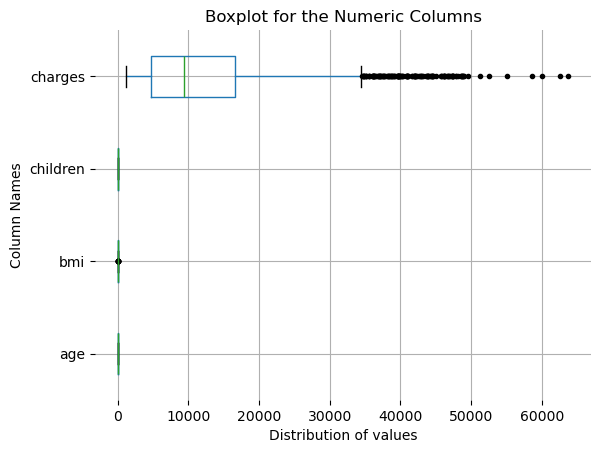

In [30]:
# Drawing boxplots for our numeric dataset, including our output variable
df_insure.boxplot(column= ["age", "bmi", "children", "charges"], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

First thing of note here is that the charges column has a higher median than the rest of the columns. Also, the outliers in this column reveal that there's deep activity beyond our maximum value. This compels us to keep the outliers. However, we can remove the values that are above 50000 as they seem like rare values.

Secondly, We cannot clearly discern the distribution of children, bmi, and age. Thus, we will draw another chart that excludes the charges column.

In [94]:
# Checking how many values in the charges column are above 50000
len(df_insure[df_insure["charges"] > 50000])

7

In [95]:
# Displaying the rows that are above 50000 in the charges column
df_insure[df_insure["charges"] > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [96]:
# Filtering out the seven columns
df_insure = df_insure[df_insure["charges"] <= 50000]
print(f"The dimension of our dataset: {df_insure.shape}")

The dimension of our dataset: (1330, 7)


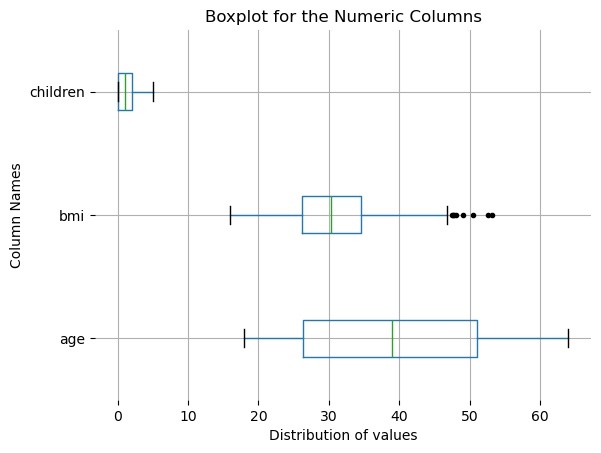

In [97]:
# Sketching boxplots for our numeric columns, excluding the charges column
df_insure.boxplot(column= ["age", "bmi", "children"], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)
plt.show() 

This is much better! Here, we can see that the age column has a higher median than the other two columns. We will not be removing BMI indices above 47 since the distribution of the column seems to rather resemble Gaussian distribution.

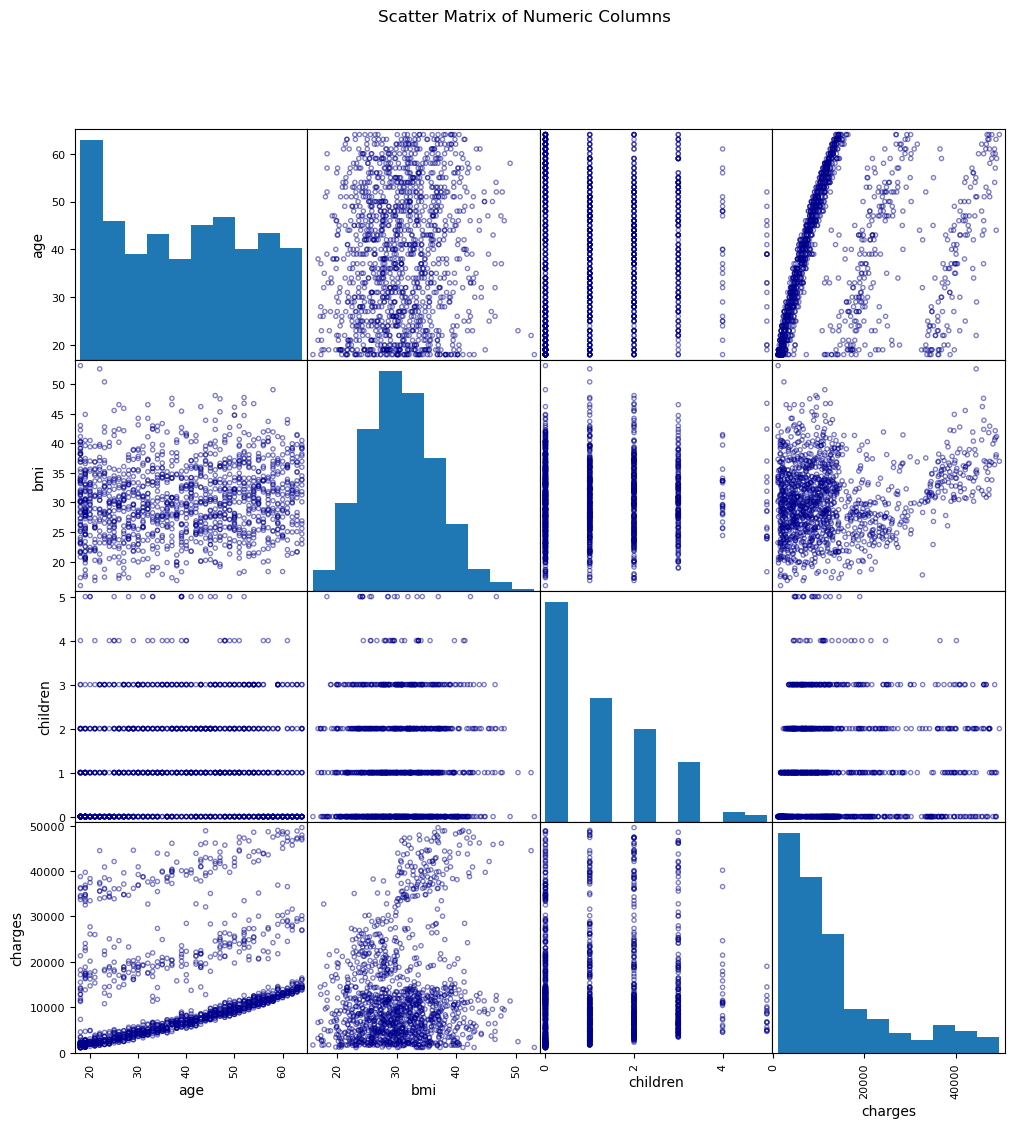

In [98]:
_ = pd.plotting.scatter_matrix(
    df_insure,
    figsize=(12, 12),
    color='none',        # Use this for point color
    edgecolors='darkblue'    # Only edgecolors, not edgecolor
)

plt.suptitle("Scatter Matrix of Numeric Columns")
plt.show()

The charges and age columns are correlated. The age distribution has a wide distribution, which would be a flat distribution had the values on the left hand side not been so frequent. Otherwise, the distribution is suggestive of high variance. The distribution of the bmi column is Gaussian. Of note, it's also narrow and tall, suggestive of small variance. The distribution of the charges column is positively skewed.

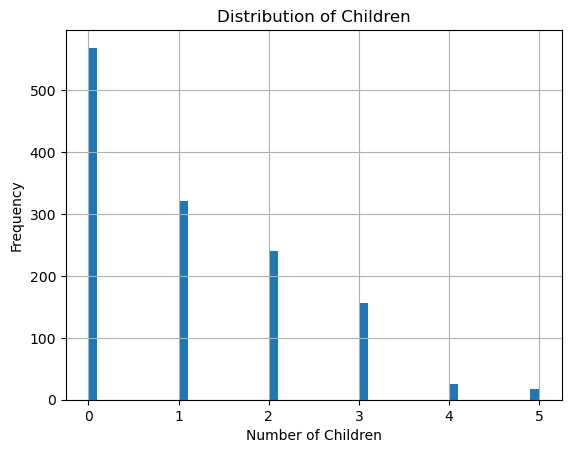

In [36]:
# Zooming in on the children column
df_insure.children.hist(bins=50)
plt.title("Distribution of Children")
plt.ylabel("Frequency")
plt.xlabel("Number of Children")
plt.show()

Customers with no kids are most frequent.

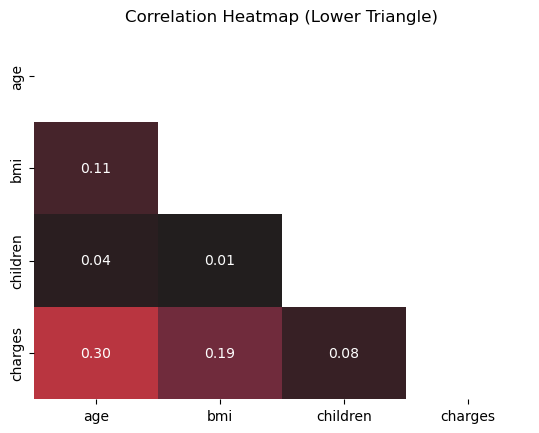

In [73]:
# Select only numeric columns
numeric_df = df_insure.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot lower triangle of correlation matrix
sns.heatmap(
    corr_matrix,
    vmin=-0.3, vmax=0.6, center=0,
    annot=True, fmt=".2f",
    mask=~np.tri(corr_matrix.shape[0], k=-1, dtype=bool),
    cbar=False
)

plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

There is low correlation between the age and charges columns. The charges column is not correlated with the bmi and children columns.

In [38]:
from statsmodels.distributions.empirical_distribution import ECDF

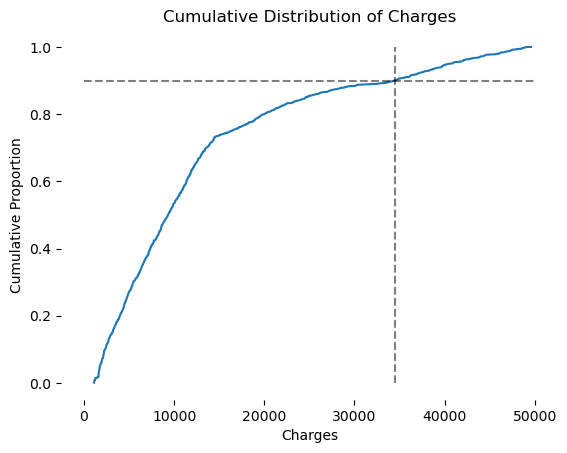

In [74]:
# Plotting cumulative distribution of charges
e = ECDF(df_insure.charges)
plt.subplot(1, 1, 1)
plt.plot(e.x, e.y)
plt.title("Cumulative Distribution of Charges")
plt.ylabel("Cumulative Proportion")
plt.xlabel("Charges")
plt.plot([0, 50000], [0.9, 0.9], "k--", alpha=0.5)
plt.plot([df_insure.charges.quantile(.9), df_insure.charges.quantile(.9)], [0, 1], "k--", alpha=0.5)
plt.box(False)
plt.show()

the dotted lines observed in this cumulative distribution plot emphasize the 90th percentile. The chart identifies that 90% of charges are above 30000 but less than 50000.

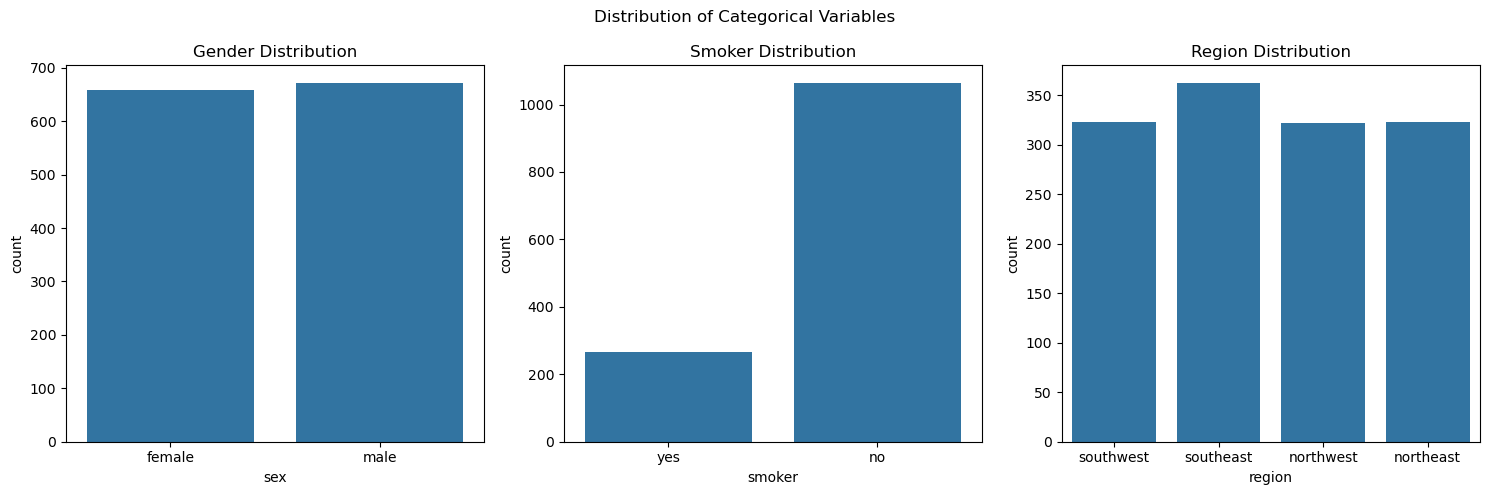

In [40]:
# Plotting distributions of categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Distribution of Categorical Variables")

# Plot sex
sns.countplot(ax=axes[0], x=df_insure.sex)
axes[0].set_title("Gender Distribution")

# Plot smoker
sns.countplot(ax=axes[1], x=df_insure.smoker)
axes[1].set_title("Smoker Distribution")

# Plot region
sns.countplot(ax=axes[2], x=df_insure.region)
axes[2].set_title("Region Distribution")

# Show the plot
plt.tight_layout()
plt.show()

As we noticed above, the distribution of males and females is fair, there are more non-smokers compared to smokers, and most of the customers are from the southeast region.

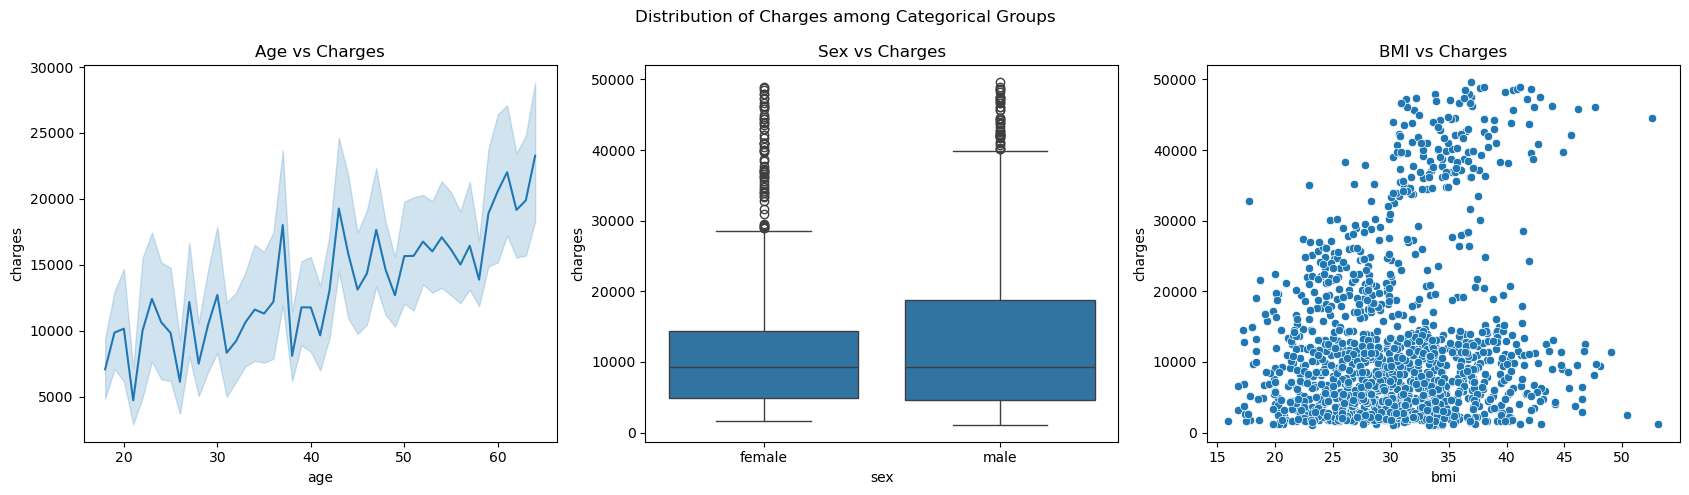

In [41]:
# Plotting distribution of charges among features
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle("Distribution of Charges among Categorical Groups")

# Plot age vs charges
sns.lineplot(ax=axes[0], x=df_insure.age, y=df_insure.charges)
axes[0].set_title("Age vs Charges")

# Plot sex vs charges
sns.boxplot(ax=axes[1], x=df_insure.sex, y=df_insure.charges)
axes[1].set_title("Sex vs Charges")

# Plot bmi vs charges
sns.scatterplot(ax=axes[2], x=df_insure.bmi, y=df_insure.charges)
axes[2].set_title("BMI vs Charges")

# Show the plot
plt.tight_layout()
plt.show()


Charges against the age variable show an upward trend, suggesting they rise with age. Males and females have the same median value of charges, however, the distribution of charges for males has a larger variance compared to females. For the BMI column, charges are clustered around 10000.

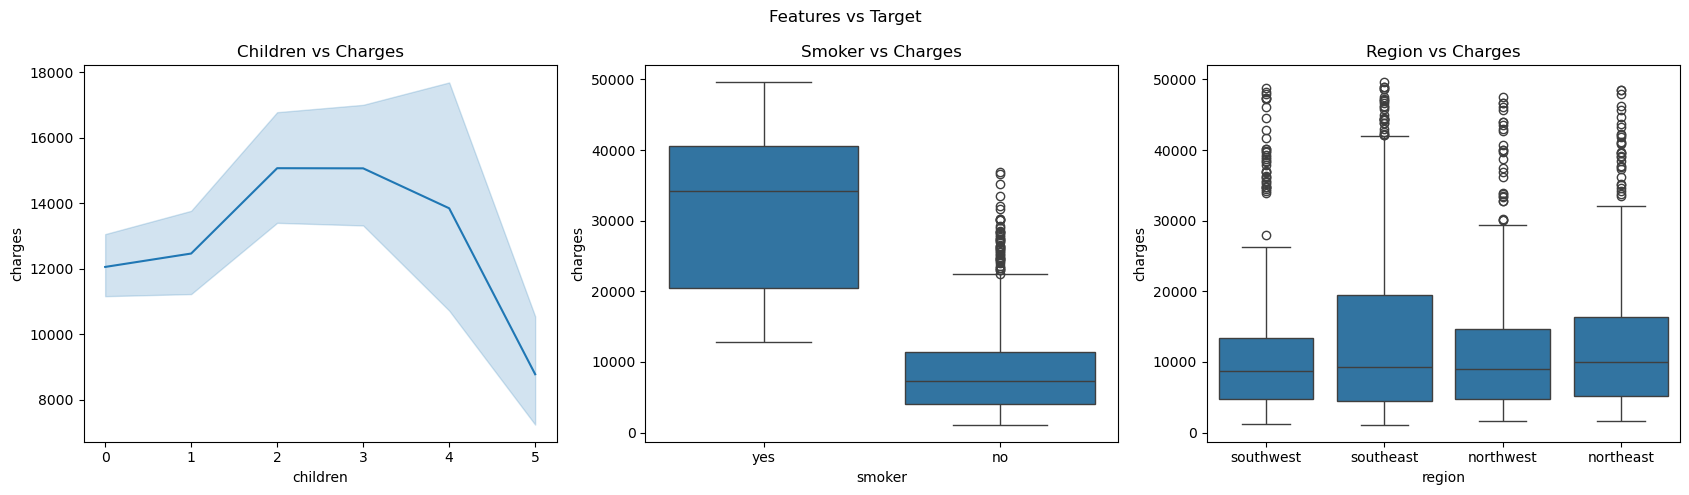

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle("Features vs Target")

# Plot children vs charges
sns.lineplot(ax=axes[0], x=df_insure.children, y=df_insure.charges)
axes[0].set_title("Children vs Charges")

# Plot smoker vs charges
sns.boxplot(ax=axes[1], x=df_insure.smoker, y=df_insure.charges)
axes[1].set_title("Smoker vs Charges")

# Plot region vs charges
sns.boxplot(ax=axes[2], x=df_insure.region, y=df_insure.charges)
axes[2].set_title("Region vs Charges")

# Show the plot
plt.tight_layout()
plt.show()

Charges are higher for customer with 2 - 3 children, and also higher for smokers. The charges for the northeast region is slightly higher compared to the other regions.

4. Modelling

In [99]:
# Displaying the columns
df_insure.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [100]:
# Encoding our categorical features
print("Original features:\n", list(df_insure.columns), "\n")
data_dummies = pd.get_dummies(df_insure[["age", "bmi", "children", "region", "charges", "sex", "smoker"]])
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] 

Features after get_dummies:
 ['age', 'bmi', 'children', 'charges', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes']


In [101]:
# Checking out data dimensions
print(f"Dimensions: {data_dummies.shape}\n")

Dimensions: (1330, 12)



In [46]:
# Having a glimpse at our data after encoding
data_dummies.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,False,False,False,True,True,False,False,True
1,18,33.770,1,1725.55230,False,False,True,False,False,True,True,False
2,28,33.000,3,4449.46200,False,False,True,False,False,True,True,False
3,33,22.705,0,21984.47061,False,True,False,False,False,True,True,False
4,32,28.880,0,3866.85520,False,True,False,False,False,True,True,False


In [102]:
# Convert all boolean columns to float
bool_cols = data_dummies.select_dtypes(include='bool').columns
data_dummies[bool_cols] = data_dummies[bool_cols].astype(float)

In [103]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1330 non-null   int64  
 1   bmi               1330 non-null   float64
 2   children          1330 non-null   int64  
 3   charges           1330 non-null   float64
 4   region_northeast  1330 non-null   float64
 5   region_northwest  1330 non-null   float64
 6   region_southeast  1330 non-null   float64
 7   region_southwest  1330 non-null   float64
 8   sex_female        1330 non-null   float64
 9   sex_male          1330 non-null   float64
 10  smoker_no         1330 non-null   float64
 11  smoker_yes        1330 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 135.1 KB


In [104]:
from sklearn.preprocessing import StandardScaler

# Select features (without target 'charges')
feature_cols = ["age", "bmi", "children", "region_northeast", "region_northwest",
                "region_southeast", "region_southwest", "smoker_no", "smoker_yes",
                "sex_male", "sex_female"]

X = data_dummies[feature_cols].values  # Extract features as NumPy array
y = data_dummies["charges"].values     # Extract target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)     # Scale features only

print(f"X_scaled.shape: {X_scaled.shape} y.shape: {y.shape}")


X_scaled.shape: (1330, 11) y.shape: (1330,)


In [105]:
from sklearn.decomposition import PCA

# Choose number of components via explained variance
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

In [106]:
print(f"Number of components chosen: {pca.n_components_}")

Number of components chosen: 8


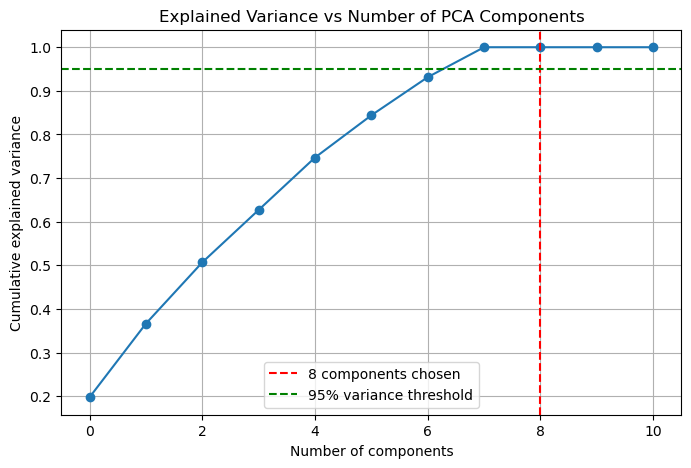

In [108]:
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.axvline(x=pca.n_components_, color='r', linestyle='--', label='8 components chosen')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance threshold')
plt.legend()
plt.show()

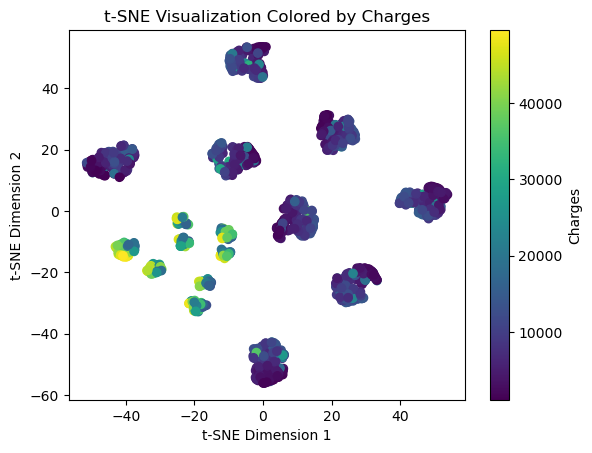

In [111]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Charges')
plt.xlabel('t-SNE Dimension 1')  
plt.ylabel('t-SNE Dimension 2')  
plt.title('t-SNE Visualization Colored by Charges')
plt.show()


In [113]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 10  # You can tune this

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='linear')(encoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)
encoder = models.Model(inputs=input_layer, outputs=encoded)

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, verbose=0)

# Get reduced features
X_auto = encoder.predict(X_scaled)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

def evaluate(X_reduced, name):
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = mse ** 0.5

    print(f"\n{name} Regression Results:")
    print("R2 Score:", r2_score(y_test, preds))
    print("RMSE:",rmse)

evaluate(X_pca, "PCA")
evaluate(X_auto, "Autoencoder")



PCA Regression Results:
R2 Score: 0.7270533980679407
RMSE: 6197.063787873539

Autoencoder Regression Results:
R2 Score: 0.7225470989368525
RMSE: 6248.010570443846


In [118]:
from tensorflow.keras import layers, models

input_dim = X_scaled.shape[1]
encoding_dim = 20  # Try tuning this

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)
encoder = models.Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, verbose=1)

X_auto = encoder.predict(X_scaled)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9333 
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4210
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1469
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0609
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0219
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
Epo

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

def evaluate(X_reduced, name):
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = mse ** 0.5

    print(f"\n{name} Regression Results:")
    print("R2 Score:", r2_score(y_test, preds))
    print("RMSE:",rmse)

evaluate(X_pca, "PCA")
evaluate(X_auto, "Autoencoder")


PCA Regression Results:
R2 Score: 0.7270533980679407
RMSE: 6197.063787873539

Autoencoder Regression Results:
R2 Score: 0.7420154155346996
RMSE: 6024.818921534212


In [120]:
autoencoder.save('autoencoder_model.h5')

In [ ]:
import os
print(os.getcwd())
